In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Path setup
ride_path = 'raw_data/ride_data.csv'
city_path = 'raw_data/city_data.csv'

# Initial dataframe creation
ride_df = pd.read_csv(ride_path, dtype = {'city' : object,
                                         'date' : object,
                                         'fare' : float,
                                         'ride_id' : int})

city_df = pd.read_csv(city_path, dtype = {'city' : object,
                                         'driver_count' : int,
                                         'type' : object})
#    There were two "Port James" entries in city_data.  Both suburban, one with 3 rides the other with 15.  
#    I deleted the one with 3

print(ride_df.head(3))
print()
print(city_df.head(3))

          city                 date   fare     ride_id
0     Sarabury  2016-01-16 13:49:27  38.35   620176670
1    South Roy  2016-01-02 18:42:34  17.49  -996922298
2  Wiseborough  2016-01-21 17:35:29  44.18 -1384811717

           city  driver_count   type
0    Kelseyland            63  Urban
1    Nguyenbury             8  Urban
2  East Douglas            12  Urban


In [3]:
ride_df_city = ride_df.groupby('city')
city_df_city = city_df.set_index('city')

# Average fare by city
avg_fare_city = ride_df_city['fare'].mean()

# Number of rides per city
total_rides_city = ride_df_city['ride_id'].count()

# Number of drivers per city
total_drivers_city = city_df_city['driver_count']

# City types
city_types = city_df_city['type']

# Dataframe building
bubble_df = pd.concat([avg_fare_city, 
                       total_rides_city, 
                       total_drivers_city, 
                       city_types],
                     axis = 1)
bubble_df = bubble_df.rename(columns={'fare' : 'Average Fare ($)',
                                   'ride_id' : 'Total Number of Rides (Per City)',
                                   'driver_count' : 'driver count per city',
                                   'type' : 'City Types'})

# Dataframe culling by city type
urban_df = bubble_df.loc[bubble_df['City Types'] == 'Urban', :]
suburban_df = bubble_df.loc[bubble_df['City Types'] == 'Suburban', :]
rural_df = bubble_df.loc[bubble_df['City Types'] == 'Rural', :]

# Set area of markers proportional to driver count
area1 = urban_df['driver count per city'] * 20
area2 = suburban_df['driver count per city'] * 20
area3 = rural_df['driver count per city'] * 20


Text(0,0.5,'Average Fare ($)')

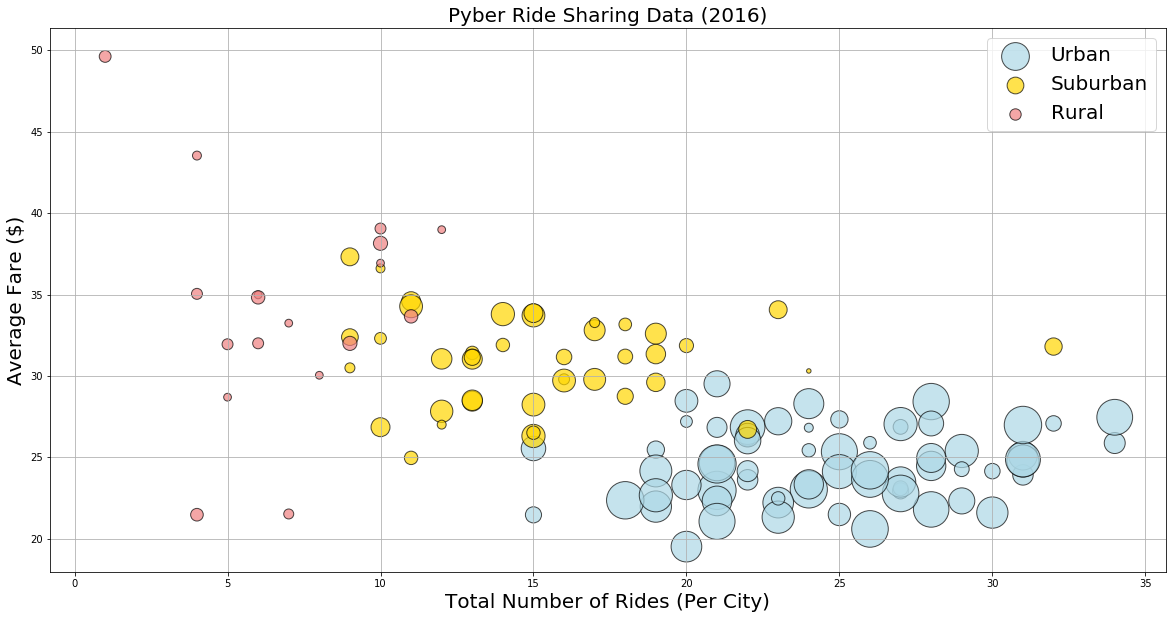

In [4]:
# Creating separate scatter plots for each city type, and combining them
ax1 = urban_df.plot(kind='scatter', x='Total Number of Rides (Per City)', y='Average Fare ($)', s=area1, color='lightblue', edgecolor='black', alpha=0.7, label='Urban', figsize=(20,10))    
ax2 = suburban_df.plot(kind='scatter', x='Total Number of Rides (Per City)', y='Average Fare ($)', s=area2, color='gold', edgecolor='black', alpha=0.7, ax=ax1, label='Suburban')    
ax3 = rural_df.plot(kind='scatter', x='Total Number of Rides (Per City)', y='Average Fare ($)', s=area3, color='lightcoral', edgecolor='black', alpha=0.7, ax=ax1, label='Rural')

# Plot formatting
plt.legend(fontsize=20)
plt.grid()
plt.title('Pyber Ride Sharing Data (2016)', fontsize=20)
plt.xlabel('Total Number of Rides (Per City)', fontsize=20)
plt.ylabel('Average Fare ($)', fontsize=20)


<big>Note:  <br>
    Circle size correlates with number of drivers per city. 
    </big>

([<matplotlib.patches.Wedge at 0x16159b899e8>,
 [Text(-3.39423,-0.197959,'Urban'),
  Text(3.36092,-0.514003,'Suburban'),
  Text(1.80339,2.88233,'Rural')],
 [Text(-1.89678,-0.110624,'63.0%'),
  Text(1.87816,-0.287237,'30.3%'),
  Text(1.00777,1.61071,'6.7%')])

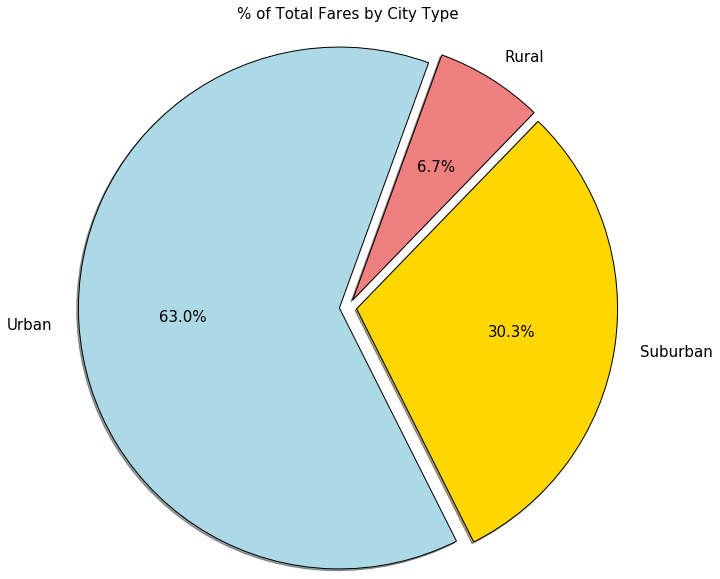

In [5]:
city_type = city_df.set_index('city')
city_type = city_type['type']


pie_df = ride_df.join(city_type, on='city')

pie_df_urban = pie_df.loc[pie_df['type'] == 'Urban', :]
pie_df_suburban = pie_df.loc[pie_df['type'] == 'Suburban', :]
pie_df_rural = pie_df.loc[pie_df['type'] == 'Rural', :]


pie_df_urban = pie_df_urban.groupby('type')
pie_df_suburban = pie_df_suburban.groupby('type')
pie_df_rural = pie_df_rural.groupby('type')

explode = [0.1, 0.1, 0.1]
text = {'fontsize' : 15}
wedge = {'edgecolor' : 'black'}


fare_urban = pie_df_urban['fare'].sum()
fare_suburban = pie_df_suburban['fare'].sum()
fare_rural = pie_df_rural['fare'].sum()

fare_labels = ['Urban', 'Suburban', 'Rural']
fare_totals = pd.Series([fare_urban, fare_suburban, fare_rural])
fare_colors = ['lightblue', 'gold', 'lightcoral']

plt.axis("equal")
plt.title('% of Total Fares by City Type', y=1.80, fontsize=15)
plt.pie(fare_totals, radius=3, textprops=text, wedgeprops=wedge, labels=fare_labels, explode=explode, colors=fare_colors,
        autopct="%1.1f%%", shadow=True, startangle=70)



([<matplotlib.patches.Wedge at 0x16159be59b0>,
 [Text(-3.39484,-0.1873,'Urban'),
  Text(3.37936,-0.374026,'Suburban'),
  Text(2.16146,2.62452,'Rural')],
 [Text(-1.89711,-0.104667,'68.4%'),
  Text(1.88847,-0.209015,'26.3%'),
  Text(1.20787,1.46664,'5.3%')])

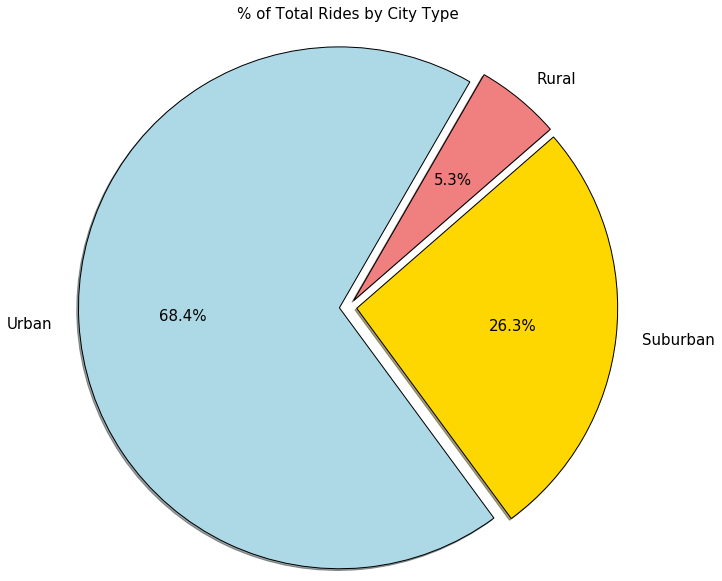

In [6]:
rides_urban = pie_df_urban['fare'].count()
rides_suburban = pie_df_suburban['fare'].count()
rides_rural = pie_df_rural['fare'].count()

rides_labels = ['Urban', 'Suburban', 'Rural']
rides_totals = [rides_urban, rides_suburban, rides_rural]
rides_colors = ['lightblue', 'gold', 'lightcoral']

plt.axis("equal")
plt.title('% of Total Rides by City Type', y=1.80, fontsize=15)
plt.pie(rides_totals, radius=3, textprops=text, wedgeprops=wedge, labels=rides_labels, explode=explode, colors=rides_colors,
        autopct="%1.1f%%", shadow=True, startangle=60)


([<matplotlib.patches.Wedge at 0x16159c37fd0>,
 [Text(-3.39997,-0.0145427,'Urban'),
  Text(3.38519,-0.316995,'Suburban'),
  Text(2.80521,1.92115,'Rural')],
 [Text(-1.89998,-0.00812682,'77.9%'),
  Text(1.89172,-0.177144,'19.0%'),
  Text(1.56762,1.07358,'3.1%')])

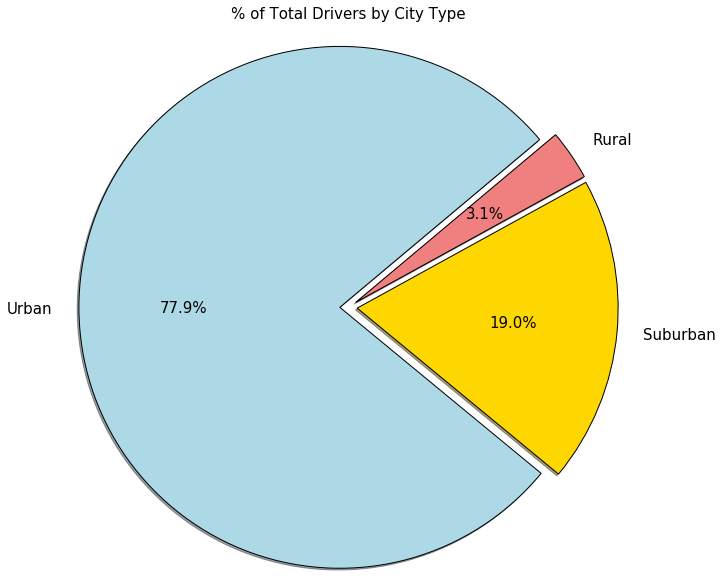

In [7]:
drivers_df = city_df.groupby('type')
drivers_total = drivers_df['driver_count'].sum()

drivers_labels = ['Urban', 'Suburban', 'Rural']
drivers_totals = [drivers_total['Urban'], drivers_total['Suburban'], drivers_total['Rural']]
drivers_colors = ['lightblue', 'gold', 'lightcoral']

plt.axis("equal")
plt.title('% of Total Drivers by City Type', y=1.80, fontsize=15)
plt.pie(drivers_totals, radius=3, textprops=text, wedgeprops=wedge, labels=drivers_labels, explode=explode, colors=drivers_colors,
        autopct="%1.1f%%", shadow=True, startangle=40)